In [17]:
# Importing the libraries
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('C:\\Users\Lenovo\OneDrive\Desktop\\adm_data.csv')
X = dataset.iloc[:,:-1]
y = dataset.iloc[:, -2]
print(X)
print(y)
print('----------------------------------------------------')

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  
0           1  
1           1  
2  

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, shuffle =True)

print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

# print(X_train)
# print(X_test)
# print(y_train)
# print(y_test)



x train:  (300, 8)
x test:  (100, 8)
y train:  (300,)
y test:  (100,)


In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print('X_train Scaling',X_train)
print('X_test Scaling',X_test)

X_train Scaling [[-1.22745513 -0.62697677 -1.18220155 ... -0.43147334 -0.77563241
  -1.1055416 ]
 [-0.43326516  0.41030097  0.79454047 ...  1.79070697  0.82360967
   0.90453403]
 [-1.64181511  1.01537966  0.79454047 ...  1.23516189  0.89024476
   0.90453403]
 ...
 [-0.04480267 -0.54053696 -0.19383054 ... -0.98701842 -0.39248066
  -1.1055416 ]
 [-0.24335017  0.41030097  0.62981197 ...  0.67961681  0.67368073
   0.90453403]
 [-0.69224015 -0.54053696 -0.19383054 ... -0.98701842 -0.34250435
  -1.1055416 ]]
X_test Scaling [[-0.15702517 -0.02189809 -0.19383054 -0.92222165 -0.83492831  0.67961681
  -0.40913943 -1.1055416 ]
 [-1.69361011  0.41030097  0.30035497 -0.03547006 -0.34475513  0.67961681
  -0.60904469  0.90453403]
 [-1.21882263 -0.79985639 -1.01747305 -0.03547006  0.63559122 -0.43147334
  -0.60904469 -1.1055416 ]
 [ 0.94793479 -0.45409715 -0.02910204  0.85128152  1.1257644   1.23516189
   0.72365704  0.90453403]
 [-0.88215514  0.49674079 -0.02910204 -0.03547006  0.14541804  0.12407173

In [20]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
SVCModel = SVC(kernel= 'sigmoid',# it can be also linear,poly,sigmoid,precomputed,
                max_iter=100,C=1.0,gamma='auto')
SVCModel.fit(X_train, y_train )
y_pred_svm =SVCModel.decision_function(X_test)

print('----------------------------------------------------')

print('SVCModel Train Score is : ' , SVCModel.score(X_train, y_train))
print('SVCModel Test Score is : ' , SVCModel.score(X_test, y_test))
print('SVCModel Classes are : ' , SVCModel.classes_)
print('----------------------------------------------------')


----------------------------------------------------
SVCModel Train Score is :  0.9766666666666667
SVCModel Test Score is :  0.99
SVCModel Classes are :  [0 1]
----------------------------------------------------


In [21]:
# Predicting the Test set results
y_pred = SVCModel.predict(X_test)
print('Predicted Value for SVCModel is : ' ,list(y_pred[:10]))

print('True Value for  is : ' ,list(y_test[:10]))
print('----------------------------------------------------')



Predicted Value for SVCModel is :  [0, 1, 0, 1, 1, 0, 0, 1, 0, 1]
True Value for  is :  [0, 1, 0, 1, 1, 0, 0, 1, 0, 1]
----------------------------------------------------


In [22]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', cm)
print('----------------------------------------------------')


Confusion Matrix is : 
 [[45  1]
 [ 0 54]]
----------------------------------------------------


<AxesSubplot:>

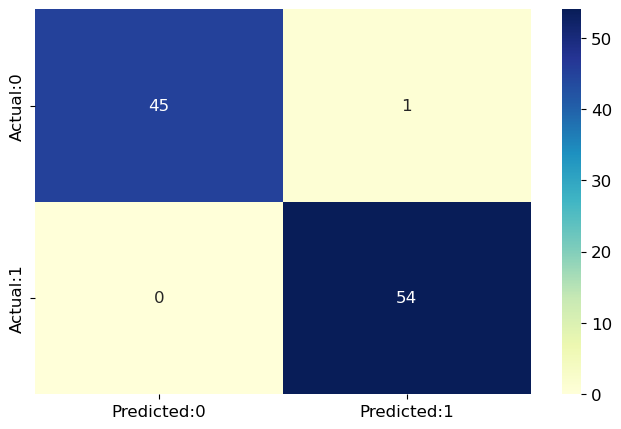

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [24]:
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
from sklearn.metrics import accuracy_score
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)
print('----------------------------------------------------')


Accuracy Score is :  99
----------------------------------------------------


In [25]:
#Calculating Receiver Operating Characteristic :  
#roc_curve(y_true, y_score, pos_label=None, sample_weight=None,drop_intermediate=True)
from sklearn.metrics import roc_curve
fprValue, tprValue, thresholdsValue = roc_curve(y_test,y_pred)
print('fpr Value  : ', fprValue)
print('tpr Value  : ', tprValue)
print('thresholds Value  : ', thresholdsValue)
print('----------------------------------------------------')


fpr Value  :  [0.         0.02173913 1.        ]
tpr Value  :  [0. 1. 1.]
thresholds Value  :  [2 1 0]
----------------------------------------------------


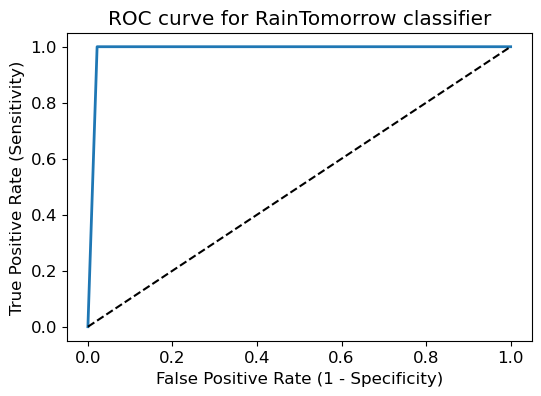

In [26]:
plt.figure(figsize=(6,4))

plt.plot(fprValue, tprValue, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [27]:
#Calculating Zero One Loss:  
#zero_one_loss(y_true, y_pred, normalize = True, sample_weight = None)

from sklearn.metrics import zero_one_loss
ZeroOneLossValue = zero_one_loss(y_test,y_pred,normalize=False) 
print('Zero One Loss Value : ', ZeroOneLossValue )

print('----------------------------------------------------')


Zero One Loss Value :  1
----------------------------------------------------


In [28]:
from sklearn.metrics import roc_auc_score
#----------------------------------------------------
#Calculating ROC AUC Score:  
#roc_auc_score(y_true, y_score, average=’macro’, sample_weight=None,max_fpr=None)

ROCAUCScore = roc_auc_score(y_test,y_pred, average='micro') #it can be : macro,weighted,samples
print('ROC AUC Score : ', ROCAUCScore)

ROC AUC Score :  0.9891304347826088


In [29]:
from sklearn.metrics import precision_score
#----------------------------------------------------

#Calculating Precision Score : (Specificity) #(TP / float(TP + FP))  
# precision_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’,sample_weight=None)

PrecisionScore = precision_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Precision Score (Specificity) is : ', PrecisionScore)

Precision Score (Specificity) is :  0.99


In [30]:
from sklearn.metrics import recall_score
#----------------------------------------------------


#Calculating Recall Score : (Sensitivity) (TP / float(TP + FN))   1 / 1+2  
# recall_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

RecallScore = recall_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Recall Score(Sensitivity) is : ', RecallScore)

Recall Score(Sensitivity) is :  0.99


In [31]:
from sklearn.metrics import f1_score
#----------------------------------------------------
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

F1 Score is :  0.99
